In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import math

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [3]:
Dataset = pd.read_csv('SpaData.csv')

In [4]:
Dataset

,ID,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2342,06-02-15 8:51,20.840,19.745000,433.0,629.750000,0.003000,1
1,6419,09-02-15 4:49,19.290,26.890000,0.0,466.000000,0.003716,0
2,3330,07-02-15 1:20,20.000,18.700000,0.0,435.500000,0.002696,0
3,7188,09-02-15 17:38,22.200,38.433333,429.5,1943.500000,0.006381,1
4,7655,10-02-15 1:25,20.245,32.900000,0.0,469.000000,0.004833,0
...,...,...,...,...,...,...,...,...
6509,7362,09-02-15 20:31,20.500,34.590000,0.0,868.500000,0.005164,0
6510,1591,05-02-15 20:21,21.200,19.340000,0.0,483.500000,0.003004,0
6511,4629,07-02-15 22:59,19.600,28.600000,0.0,435.000000,0.004031,0
6512,3657,07-02-15 6:47,19.760,19.230000,0.0,450.333333,0.002732,0


In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6514 non-null   int64  
 1   TimeStamp         6514 non-null   object 
 2   Temperature       6514 non-null   float64
 3   RelativeHumidity  6514 non-null   float64
 4   Light             6514 non-null   float64
 5   OxygenLevels      6514 non-null   float64
 6   HumidityRatio     6514 non-null   float64
 7   GTOccupancy       6514 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 407.2+ KB


In [6]:
Dataset['TimeStamp'] = pd.to_datetime(Dataset['TimeStamp'])

In [7]:
Dataset.describe(include = 'all').transpose()

<ipython-input-7-66aec7bee99c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Dataset.describe(include = 'all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ID,6514.0,NaN,NaT,NaN,NaT,NaT,4085.903592,2351.02819,1.0,2048.25,4104.5,6129.75,8143.0
TimeStamp,6514,5492,2015-08-02 20:44:00,2,2015-04-02 17:51:00,2015-10-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,6514.0,NaN,NaT,NaN,NaT,NaT,20.61622,1.020584,19.0,19.7,20.39,21.39,23.18
RelativeHumidity,6514.0,NaN,NaT,NaN,NaT,NaT,25.766588,5.529035,16.79,20.290625,26.245,30.55,39.09
Light,6514.0,NaN,NaT,NaN,NaT,NaT,119.560216,194.654809,0.0,0.0,0.0,256.5625,1546.333333
OxygenLevels,6514.0,NaN,NaT,NaN,NaT,NaT,607.699139,316.244003,412.75,439.0,453.5,642.583333,2028.5
HumidityRatio,6514.0,NaN,NaT,NaN,NaT,NaT,0.003867,0.000852,0.002674,0.003097,0.003801,0.004352,0.006476
GTOccupancy,6514.0,NaN,NaT,NaN,NaT,NaT,0.213233,0.409622,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

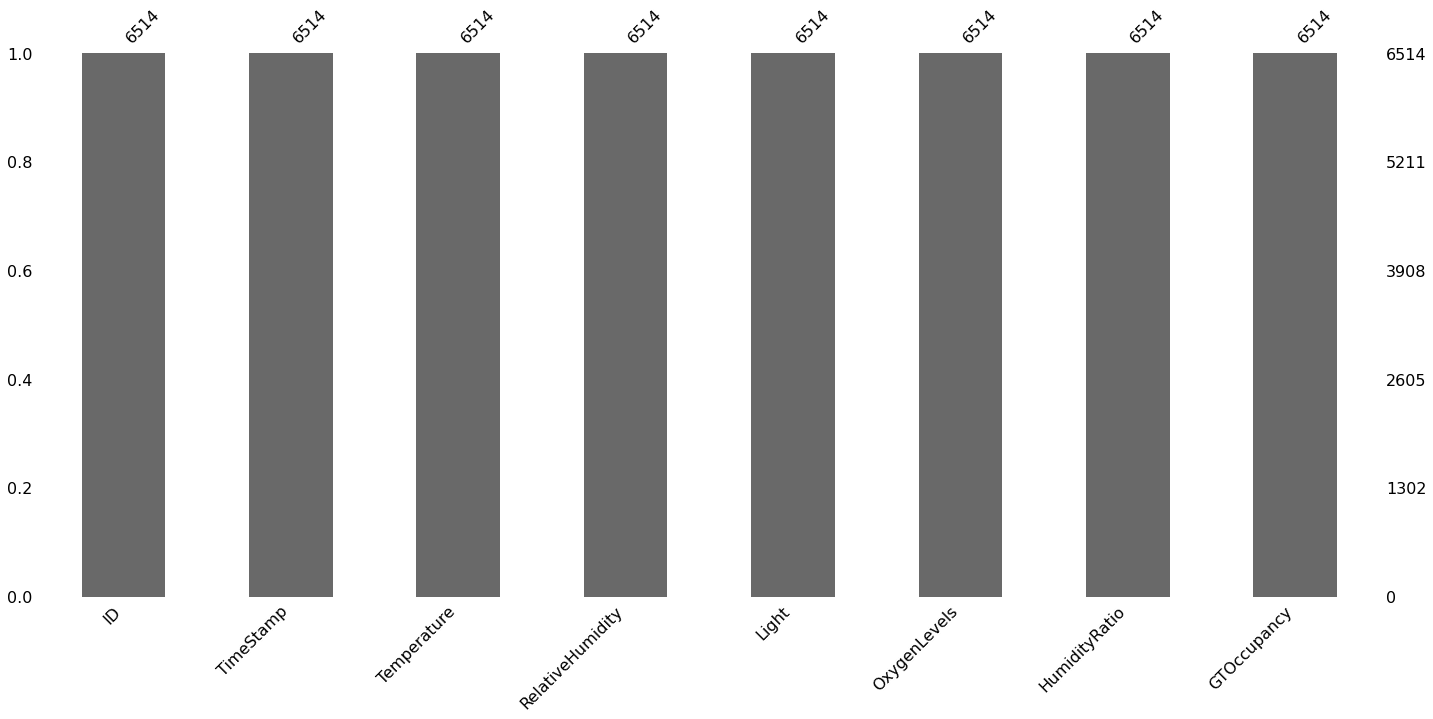

In [8]:
#Dataset.isnull().sum()
msno.bar(Dataset)

In [9]:
Dataset.GTOccupancy.value_counts()

0    5125
1    1389
Name: GTOccupancy, dtype: int64

No handles with labels found to put in legend.


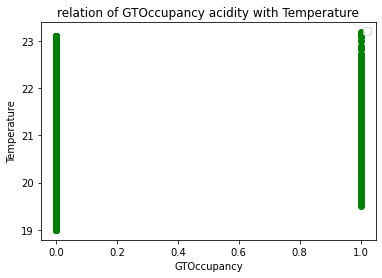

In [10]:
plt.scatter(Dataset['GTOccupancy'], Dataset['Temperature'], color = 'green')
plt.title('relation of GTOccupancy acidity with Temperature')
plt.xlabel('GTOccupancy')
plt.ylabel('Temperature')
plt.legend()
plt.show()

<AxesSubplot:xlabel='GTOccupancy', ylabel='Temperature'>

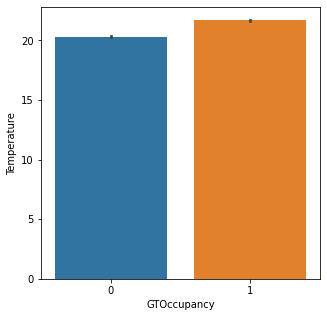

In [11]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'GTOccupancy', y = 'Temperature', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


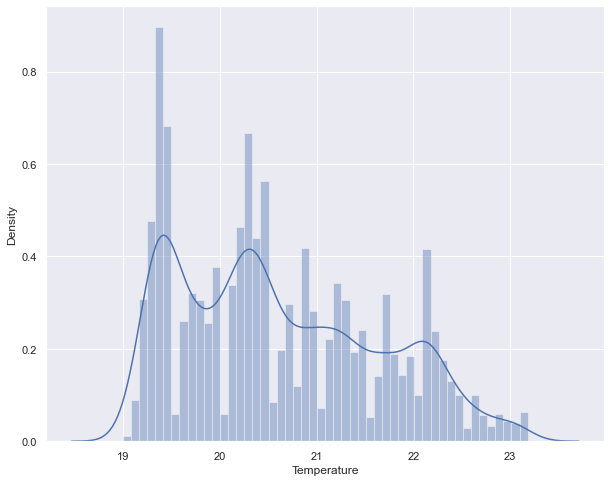

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['Temperature'], bins=50)
plt.show()

<AxesSubplot:xlabel='GTOccupancy', ylabel='RelativeHumidity'>

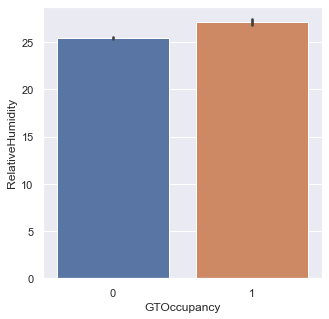

In [13]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'GTOccupancy', y = 'RelativeHumidity', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


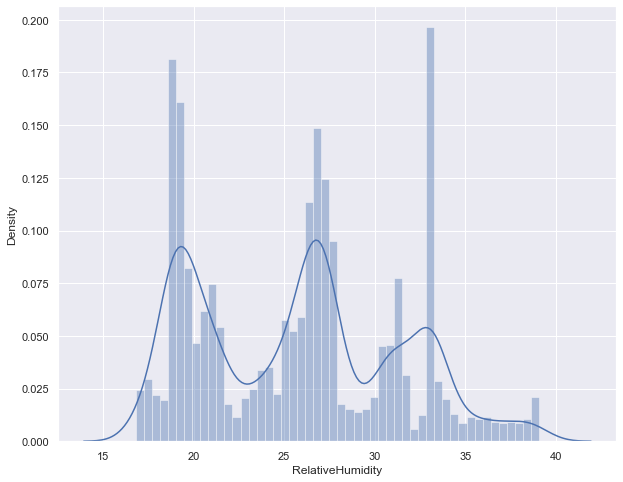

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['RelativeHumidity'], bins=50)
plt.show()

<AxesSubplot:xlabel='GTOccupancy', ylabel='Light'>

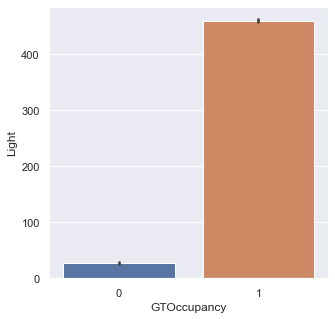

In [15]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'GTOccupancy', y = 'Light', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


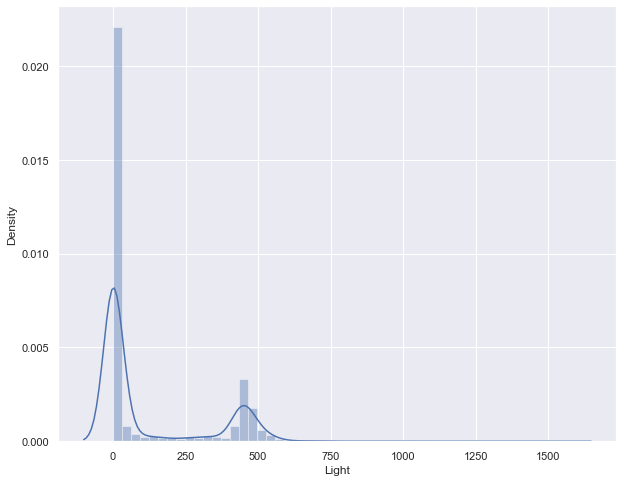

In [16]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['Light'], bins=50)
plt.show()

<AxesSubplot:xlabel='GTOccupancy', ylabel='OxygenLevels'>

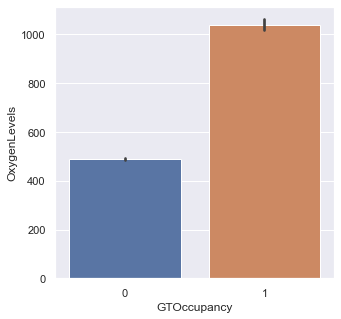

In [17]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'GTOccupancy', y = 'OxygenLevels', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


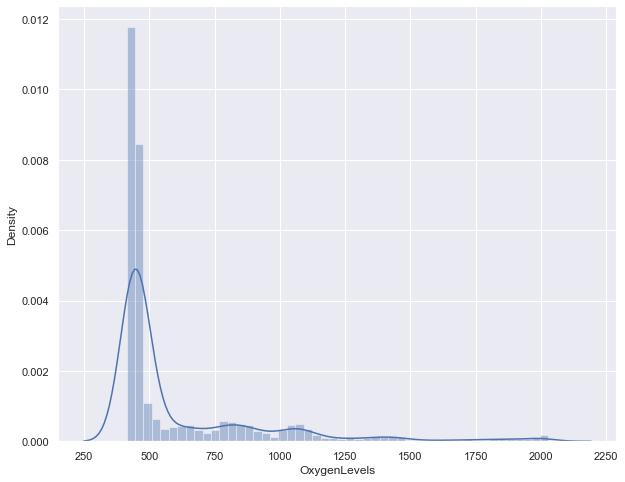

In [18]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['OxygenLevels'], bins=50)
plt.show()

<AxesSubplot:xlabel='GTOccupancy', ylabel='HumidityRatio'>

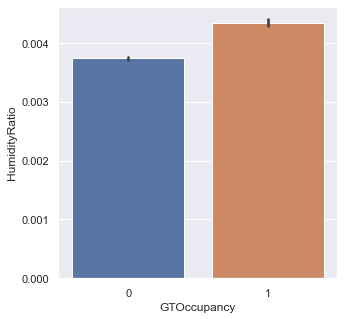

In [19]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'GTOccupancy', y = 'HumidityRatio', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


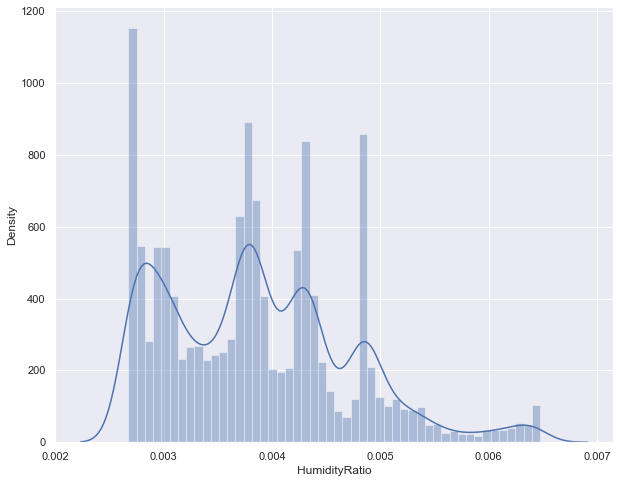

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['HumidityRatio'], bins=50)
plt.show()

<AxesSubplot:>

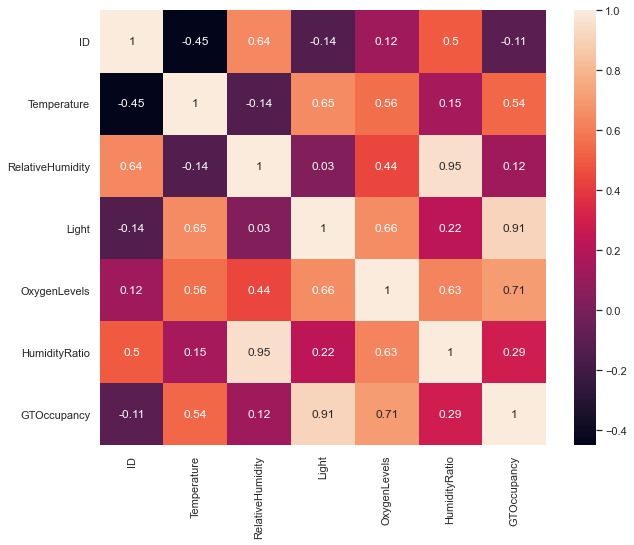

In [21]:
correlation_matrix = Dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

GTOccupancy : Temperature, Light, and OxygenLevels

Temperature & Light, Temperature & OxygenLavels, RelativeHumidity & OxygenLevels, RelativeHumidity & HumidityRatio, Light & OxygenLevels, OxygenLevels & HumidityRatio, 

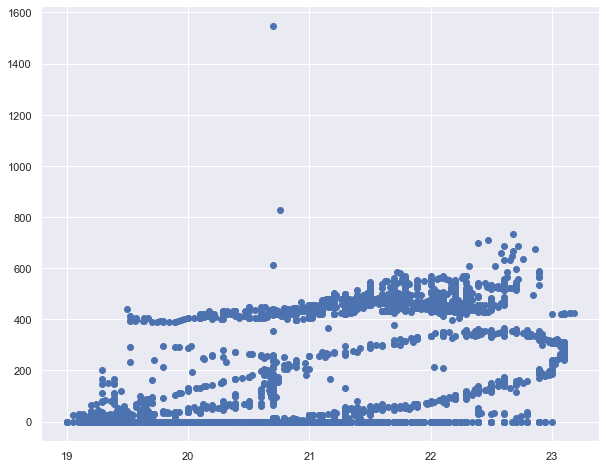

In [22]:
plt.scatter(x=Dataset['Temperature'],y=Dataset['Light'])

Text(0, 0.5, 'Oxygen_Levels')

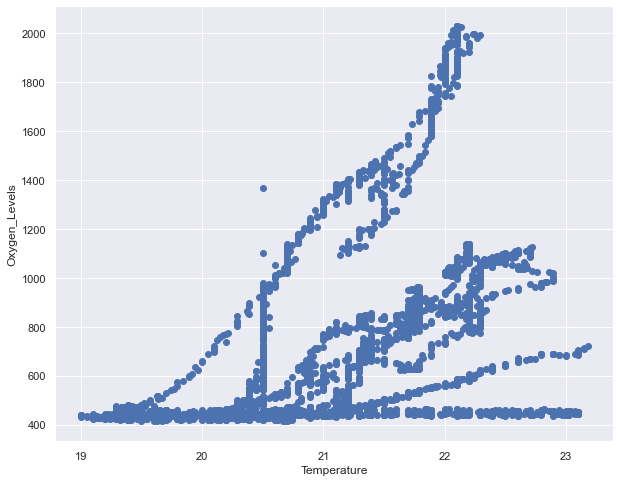

In [23]:
plt.scatter(x=Dataset['Temperature'],y=Dataset['OxygenLevels'])
plt.xlabel('Temperature')
plt.ylabel('Oxygen_Levels')

Text(0, 0.5, 'Oxygen_Levels')

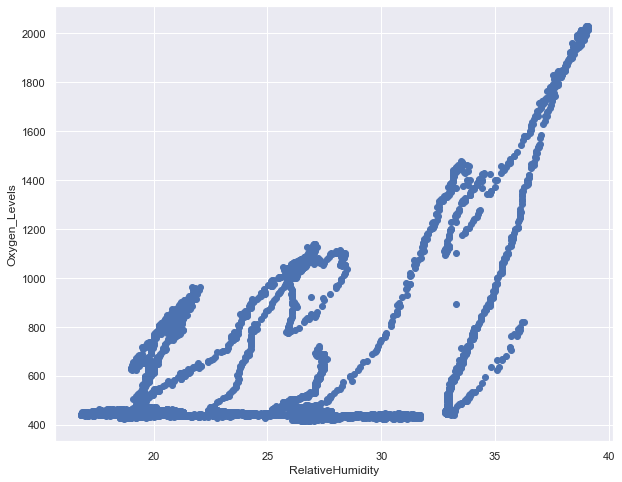

In [24]:
plt.scatter(x=Dataset['RelativeHumidity'],y=Dataset['OxygenLevels'])
plt.xlabel('RelativeHumidity')
plt.ylabel('Oxygen_Levels')

Text(0, 0.5, 'HumidityRatio')

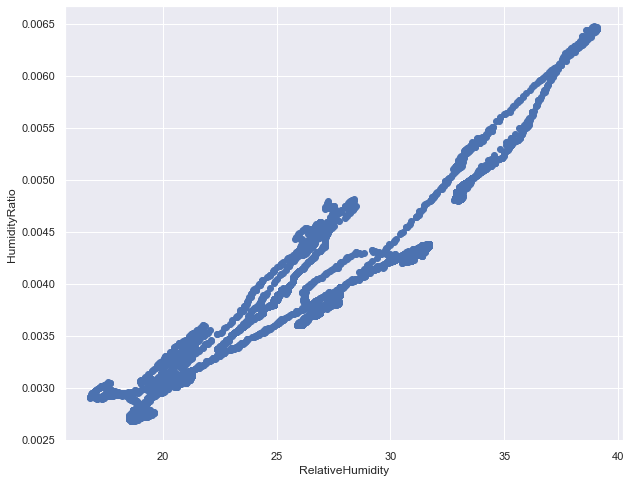

In [25]:
plt.scatter(x=Dataset['RelativeHumidity'],y=Dataset['HumidityRatio'])
plt.xlabel('RelativeHumidity')
plt.ylabel('HumidityRatio')

Text(0, 0.5, 'Oxygen_Levels')

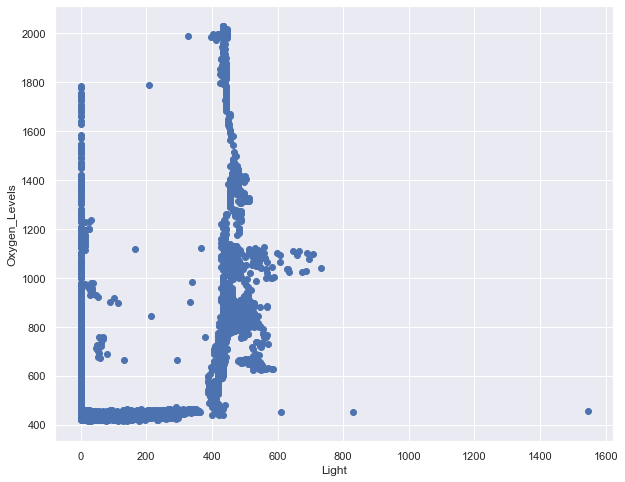

In [26]:
plt.scatter(x=Dataset['Light'],y=Dataset['OxygenLevels'])
plt.xlabel('Light')
plt.ylabel('Oxygen_Levels')

Text(0, 0.5, 'Oxygen_Levels')

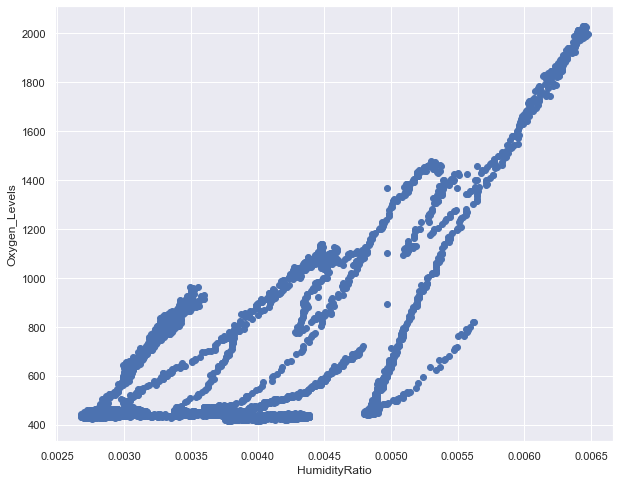

In [27]:
plt.scatter(x=Dataset['HumidityRatio'],y=Dataset['OxygenLevels'])
plt.xlabel('HumidityRatio')
plt.ylabel('Oxygen_Levels')

In [28]:
imbalance_data = Dataset[['TimeStamp', 'Temperature', 'RelativeHumidity', 'Light',
       'OxygenLevels', 'HumidityRatio', 'GTOccupancy']]

In [29]:
imbalance_data

,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2015-06-02 08:51:00,20.840,19.745000,433.0,629.750000,0.003000,1
1,2015-09-02 04:49:00,19.290,26.890000,0.0,466.000000,0.003716,0
2,2015-07-02 01:20:00,20.000,18.700000,0.0,435.500000,0.002696,0
3,2015-09-02 17:38:00,22.200,38.433333,429.5,1943.500000,0.006381,1
4,2015-10-02 01:25:00,20.245,32.900000,0.0,469.000000,0.004833,0
...,...,...,...,...,...,...,...
6509,2015-09-02 20:31:00,20.500,34.590000,0.0,868.500000,0.005164,0
6510,2015-05-02 20:21:00,21.200,19.340000,0.0,483.500000,0.003004,0
6511,2015-07-02 22:59:00,19.600,28.600000,0.0,435.000000,0.004031,0
6512,2015-07-02 06:47:00,19.760,19.230000,0.0,450.333333,0.002732,0


In [30]:
imbalance_data.GTOccupancy.value_counts()

0    5125
1    1389
Name: GTOccupancy, dtype: int64

In [31]:
from sklearn.utils import resample

In [32]:
majority_data = imbalance_data[(imbalance_data['GTOccupancy']==0)] 
minority_data = imbalance_data[(imbalance_data['GTOccupancy']==1)] 

In [33]:
majority_data.shape,minority_data.shape

((5125, 7), (1389, 7))

In [34]:
print(majority_data.GTOccupancy.value_counts())
print('------------------------------------')
print(minority_data.GTOccupancy.value_counts())

0    5125
Name: GTOccupancy, dtype: int64
------------------------------------
1    1389
Name: GTOccupancy, dtype: int64


In [35]:
#Undersampling
majority_data_downsampled = resample(majority_data, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1389, # to match majority class
                                 random_state=42)  # reproducible results

In [36]:
majority_data_downsampled.GTOccupancy.value_counts()

0    1389
Name: GTOccupancy, dtype: int64

In [37]:
print(majority_data_downsampled.GTOccupancy.value_counts())
print('------------------------------------')
print(minority_data.GTOccupancy.value_counts())

0    1389
Name: GTOccupancy, dtype: int64
------------------------------------
1    1389
Name: GTOccupancy, dtype: int64


In [38]:
balance_data = pd.concat([majority_data_downsampled,minority_data])

In [39]:
balance_data 
# now we have to suffle the whole rows

,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
1091,2015-05-02 03:08:00,20.890000,24.890,0.00,443.500000,0.003798,0
4784,2015-08-02 23:43:00,19.500000,27.200,0.00,453.000000,0.003809,0
3922,2015-08-02 05:44:00,19.290000,31.500,0.00,435.500000,0.004357,0
596,2015-07-02 09:47:00,20.790000,18.840,220.75,458.400000,0.002853,0
5649,2015-08-02 03:53:00,19.390000,31.200,0.00,436.000000,0.004343,0
...,...,...,...,...,...,...,...
6488,2015-04-02 17:53:00,23.150000,27.245,426.00,713.500000,0.004779,1
6494,2015-06-02 15:38:00,22.100000,21.225,494.00,884.500000,0.003486,1
6497,2015-05-02 08:32:00,21.323333,24.100,433.00,693.333333,0.003777,1
6498,2015-05-02 14:25:00,22.200000,27.100,441.00,839.000000,0.004486,1


In [40]:
from sklearn.utils import shuffle

In [41]:
#balance_shuffled_data1 = balance_data.sample(frac=1,random_state=42)

In [42]:
balance_shuffled_data = shuffle(balance_data,random_state=42)

In [43]:
balance_shuffled_data.head(10)
# The returned dataframe is shuffled. Also, note that the returned dataframe retains the index from previous dataframe

,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
3752,2015-07-02 18:27:00,20.290000,22.700000,0.000000,437.000000,0.003336,0
2856,2015-06-02 10:23:00,21.390000,21.390000,454.000000,854.250000,0.003364,1
2422,2015-06-02 01:45:00,20.426667,19.926667,0.000000,438.000000,0.002951,0
2366,2015-10-02 07:08:00,20.290000,33.090000,0.000000,449.000000,0.004874,0
5757,2015-05-02 09:53:00,22.100000,26.356667,462.333333,1033.000000,0.004335,1
2601,2015-07-02 03:08:00,19.790000,19.000000,0.000000,443.000000,0.002704,0
5092,2015-07-02 04:06:00,19.790000,19.290000,0.000000,438.500000,0.002746,0
504,2015-06-02 16:21:00,21.890000,21.172500,454.000000,871.750000,0.003433,1
3765,2015-07-02 07:59:00,19.700000,19.500000,0.000000,454.000000,0.002760,0
4816,2015-05-02 21:04:00,20.963333,19.790000,0.000000,471.333333,0.003030,0


In [44]:
balance_shuffled_index_data = balance_shuffled_data.reset_index(drop=True)
balance_shuffled_index_data.head(10)

,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2015-07-02 18:27:00,20.290000,22.700000,0.000000,437.000000,0.003336,0
1,2015-06-02 10:23:00,21.390000,21.390000,454.000000,854.250000,0.003364,1
2,2015-06-02 01:45:00,20.426667,19.926667,0.000000,438.000000,0.002951,0
3,2015-10-02 07:08:00,20.290000,33.090000,0.000000,449.000000,0.004874,0
4,2015-05-02 09:53:00,22.100000,26.356667,462.333333,1033.000000,0.004335,1
5,2015-07-02 03:08:00,19.790000,19.000000,0.000000,443.000000,0.002704,0
6,2015-07-02 04:06:00,19.790000,19.290000,0.000000,438.500000,0.002746,0
7,2015-06-02 16:21:00,21.890000,21.172500,454.000000,871.750000,0.003433,1
8,2015-07-02 07:59:00,19.700000,19.500000,0.000000,454.000000,0.002760,0
9,2015-05-02 21:04:00,20.963333,19.790000,0.000000,471.333333,0.003030,0


In [45]:
balance_shuffled_index_data.GTOccupancy.value_counts()
# our dataset is balanced

0    1389
1    1389
Name: GTOccupancy, dtype: int64

#Dataset.columns
X = Dataset[['Temperature', 'RelativeHumidity', 'Light','OxygenLevels', 'HumidityRatio']]
Y = Dataset[['GTOccupancy']]

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
Y = balance_shuffled_index_data[['GTOccupancy']]

In [48]:
Y.GTOccupancy.value_counts()

0    1389
1    1389
Name: GTOccupancy, dtype: int64

In [49]:
X = balance_shuffled_index_data[['Temperature', 'RelativeHumidity', 'Light','OxygenLevels', 'HumidityRatio']]

In [50]:
X

,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio
0,20.290000,22.700000,0.000000,437.000000,0.003336
1,21.390000,21.390000,454.000000,854.250000,0.003364
2,20.426667,19.926667,0.000000,438.000000,0.002951
3,20.290000,33.090000,0.000000,449.000000,0.004874
4,22.100000,26.356667,462.333333,1033.000000,0.004335
...,...,...,...,...,...
2773,21.760000,21.200000,468.000000,890.333333,0.003410
2774,20.500000,21.000000,0.000000,455.000000,0.003125
2775,22.365000,17.745000,353.000000,452.000000,0.002960
2776,22.700000,26.890000,545.750000,1104.750000,0.004589


In [51]:
skf = StratifiedKFold()
kf = KFold()
scaler = StandardScaler()

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [53]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,Y_train)
    pred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred != Y_test))

In [54]:
knn_r_acc = []
for i in range(1,10,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,Y_train)
    test_score = knn.score(X_test_scaled,Y_test)
    train_score = knn.score(X_train_scaled,Y_train)
    knn_r_acc.append((i, test_score ,train_score))

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

In [55]:
accuracy_data = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
accuracy_data

,K,Test Score,Train Score
0,1,0.989209,1.000000
1,2,0.989209,0.996914
2,3,0.991607,0.996399
3,4,0.991607,0.994342
4,5,0.992806,0.994856
5,6,0.990408,0.994342
6,7,0.992806,0.994342
7,8,0.991607,0.994342
8,9,0.991607,0.993827


Text(0, 0.5, 'Test Score')

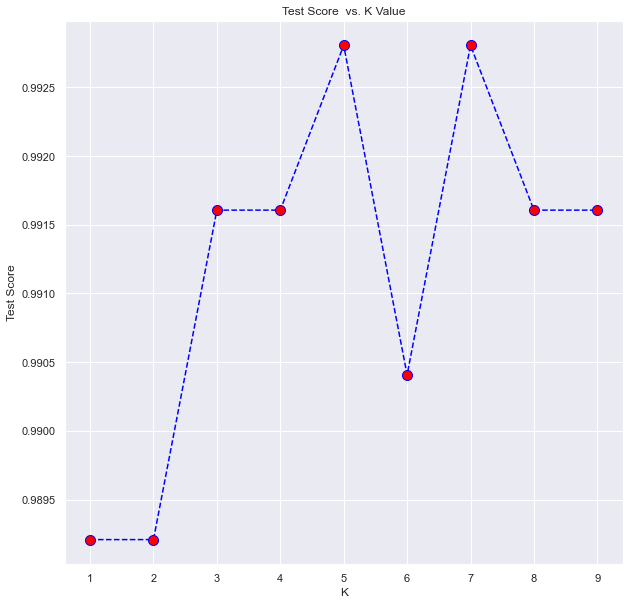

In [56]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10,1),accuracy_data['Test Score'],color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Test Score  vs. K Value')
plt.xlabel('K')
plt.ylabel('Test Score')

K can be 5 & 7

In [57]:
KNNC5 = KNeighborsClassifier(n_neighbors=5)
KNNC7 = KNeighborsClassifier(n_neighbors=7)

In [58]:
scores_KNNC5 = []
scores_KNNC7 = []

In [59]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

for train_index, test_index in skf.split(X,Y):
    X_train,X_test,Y_train,Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    scores_KNNC5.append(get_score(KNNC5,X_train,X_test,Y_train,Y_test))
    scores_KNNC7.append(get_score(KNNC7,X_train,X_test,Y_train,Y_test))

In [60]:
cross_val_score(KNNC5,X,Y)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

array([0.99100719, 0.98920863, 0.99280576, 0.99459459, 0.99279279])

In [61]:
cross_val_score(KNNC7,X,Y)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

array([0.99100719, 0.98920863, 0.99280576, 0.99459459, 0.99279279])

In [62]:
KNNC5.fit(X_train_scaled,Y_train)
Y_pred = KNNC5.predict(X_test_scaled)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [63]:
print('Test performance')
print(classification_report(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Confusion matrix')
print(confusion_matrix(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Precision')
print(precision_score(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Recall')
print(recall_score(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('F1-score')
print(f1_score(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy')
print(accuracy_score(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Matthews correlation coefficient')
print(matthews_corrcoef(Y_test,Y_pred))

Test performance
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       426
           1       0.99      1.00      0.99       408

    accuracy                           0.99       834
   macro avg       0.99      0.99      0.99       834
weighted avg       0.99      0.99      0.99       834

-------------------------------------------------------
-------------------------------------------------------
Confusion matrix
[[421   5]
 [  1 407]]
-------------------------------------------------------
-------------------------------------------------------
Precision
0.9878640776699029
-------------------------------------------------------
-------------------------------------------------------
Recall
0.9975490196078431
-------------------------------------------------------
-------------------------------------------------------
F1-score
0.9926829268292683
-------------------------------------------------------
-----------------------------

In [64]:
KNNC7.fit(X_train_scaled,Y_train)
Y_pred1 = KNNC5.predict(X_test_scaled)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [65]:
print('Test performance')
print(classification_report(Y_test, Y_pred1))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Confusion matrix')
print(confusion_matrix(Y_test, Y_pred1))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Precision')
print(precision_score(Y_test, Y_pred1))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Recall')
print(recall_score(Y_test, Y_pred1))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('F1-score')
print(f1_score(Y_test, Y_pred1))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy')
print(accuracy_score(Y_test, Y_pred1))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Matthews correlation coefficient')
print(matthews_corrcoef(Y_test,Y_pred1))

Test performance
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       426
           1       0.99      1.00      0.99       408

    accuracy                           0.99       834
   macro avg       0.99      0.99      0.99       834
weighted avg       0.99      0.99      0.99       834

-------------------------------------------------------
-------------------------------------------------------
Confusion matrix
[[421   5]
 [  1 407]]
-------------------------------------------------------
-------------------------------------------------------
Precision
0.9878640776699029
-------------------------------------------------------
-------------------------------------------------------
Recall
0.9975490196078431
-------------------------------------------------------
-------------------------------------------------------
F1-score
0.9926829268292683
-------------------------------------------------------
-----------------------------

In [66]:
KNNC5.predict_proba(X_test_scaled)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])